## Coding blocks

### 1. Compare the Tree-like algorithms:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.datasets import load_digits
from scipy.ndimage.interpolation import rotate
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

<ipython-input-1-3b50a5eb9386>:11: DeprecationWarning: Please import `rotate` from the `scipy.ndimage` namespace; the `scipy.ndimage.interpolation` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.interpolation import rotate


#### 1.1. Read in data and explore:

In [2]:
data = load_digits()

In [3]:
# Display the description on the data.
print(data['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [4]:
# The explanatory variables.
X = data['data']
X.shape

(1797, 64)

In [5]:
# The response variable.
Y = data['target']
Y.shape

(1797,)

In [6]:
# Define a visualization function.
def show_data(X, Y, n, angle=0):
    print(Y[n])
    image_matrix = X[n,:].reshape((8,8))                                        # Reshape from 1D to 2D matrix.
    image_matrix = rotate(image_matrix, angle, cval=0.01, reshape=False)        # Rotate if wanted.
    plt.imshow(image_matrix, cmap='Greys',interpolation='None')
    plt.show()


5


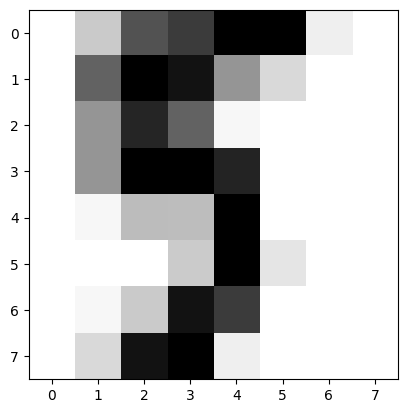

9


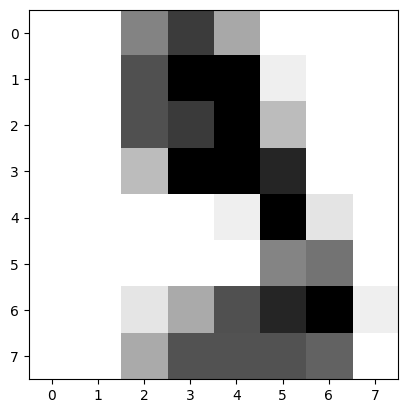

1


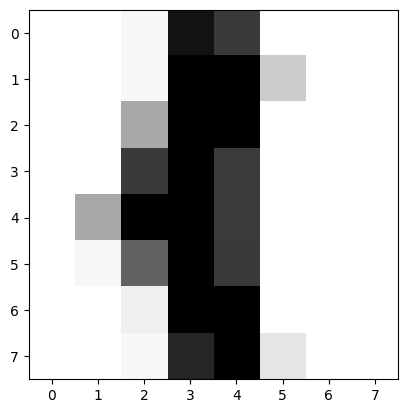

In [7]:
for i in [15,29,99]:
    show_data(X,Y,i)

#### 1.2. Data pre-processing:

In [8]:
# Min-Max scaling to the whole dataset.
X_min = X.min()
X_max = X.max()
X_range = X_max - X_min
X = (X - X_min)/X_range

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

#### 1.3. Classification with Tree (optimized hyperparameters):

NOTE: We optimize only some of the hyperparameters due to time considerataion. Students are encouraged to explore.

In [10]:
depth_grid = np.arange(1,21)
min_samples_leaf_grid = np.arange(2,31,2)
max_leaf_nodes_grid = np.arange(2,51,2)
parameters = {'max_depth':depth_grid, 'min_samples_leaf':min_samples_leaf_grid, 'max_leaf_nodes':max_leaf_nodes_grid}

In [12]:
gridCV = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10, n_jobs = -1)
gridCV.fit(X_train, Y_train)
best_depth = gridCV.best_params_['max_depth']
best_min_samples_leaf = gridCV.best_params_['min_samples_leaf']
best_max_leaf_nodes = gridCV.best_params_['max_leaf_nodes']

In [ ]:
print("Tree best max_depth : " + str(best_depth))
print("Tree best min_samples_leaf : " + str(best_min_samples_leaf))
print("Tree best max_leaf_nodes : " + str(best_max_leaf_nodes))

Tree best max_depth : 11
Tree best min_samples_leaf : 4
Tree best max_leaf_nodes : 50


In [ ]:
DTC_best = DecisionTreeClassifier(max_depth=best_depth,min_samples_leaf=best_min_samples_leaf,max_leaf_nodes=best_max_leaf_nodes)
DTC_best.fit(X_train, Y_train)
Y_pred = DTC_best.predict(X_test)
print( "Tree best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Tree best accuracy : 0.848


#### 1.4. Classification with Random Forest (optimized hyperparameters):

NOTE: We optimize only some of the hyperparameters due to time considerataion. Students are encouraged to explore.

In [ ]:
n_estimators_grid = np.arange(20, 50,5)
depth_grid = np.arange(1, 10,2)
min_samples_leaf_grid = np.arange(10,21,2)
parameters = {'n_estimators': n_estimators_grid, 'max_depth': depth_grid, 'min_samples_leaf':min_samples_leaf_grid}
gridCV = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv=10, n_jobs=-1)
gridCV.fit(X_train, Y_train)
best_n_estim = gridCV.best_params_['n_estimators']
best_depth = gridCV.best_params_['max_depth']
best_min_samples_leaf = gridCV.best_params_['min_samples_leaf']

In [ ]:
print("Random Forest best n_estimator : " + str(best_n_estim))
print("Random Forest best max_depth : " + str(best_depth))
print("Random Forest best min_samples_leaf : " + str(best_min_samples_leaf))

Random Forest best n_estimator : 45
Random Forest best max_depth : 9
Random Forest best min_samples_leaf : 12


In [ ]:
RF_best = RandomForestClassifier(n_estimators=30,max_depth=best_depth,min_samples_leaf=best_min_samples_leaf,random_state=123)
RF_best.fit(X_train, Y_train)
Y_pred = RF_best.predict(X_test)
print( "Random Forest best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Random Forest best accuracy : 0.935


#### 1.5. Classification with AdaBoost (optimized hyperparameters):

NOTE: We optimize only some of the hyperparameters due to time considerataion. Students are encouraged to explore.

In [ ]:
my_max_depth = 9                                               # Fixed.
my_learn_rate = 0.01                                           # Fixed.
n_estimators_grid = np.arange(50, 81, 5)
parameters = {'n_estimators': n_estimators_grid}
AB = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=my_max_depth), learning_rate=my_learn_rate)      # Instantiate an estimator.
gridCV = GridSearchCV(AB, param_grid=parameters, cv=10, n_jobs = -1)
gridCV.fit(X_train, Y_train)
best_n_estim = gridCV.best_params_['n_estimators']

In [ ]:
print("AdaBoost best n estimator : " + str(best_n_estim))

AdaBoost best n estimator : 60


In [ ]:
AB_best = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=my_max_depth),n_estimators=best_n_estim,learning_rate=my_learn_rate,random_state=123)
AB_best.fit(X_train, Y_train)
Y_pred = AB_best.predict(X_test)
print( "AdaBoost best accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

AdaBoost best accuracy : 0.937


# 2. Voting Ensemble:

In [ ]:
import numpy as np
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.

#### 2.1. Read in data:

In [ ]:
# Load data.
data = load_breast_cancer()

In [ ]:
# Explanatory variables.
X = data['data']
print(data['feature_names'])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
X.shape

(569, 30)

In [ ]:
# Response variable.
# Relabel such that 0 = 'benign' and 1 = malignant.
Y = 1 - data['target']
label = list(data['target_names'])
label.reverse()
print(label)

['benign', 'malignant']


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

#### 2.2. Predicting with individual estimator:

In [ ]:
# Classification Tree.
DTC = DecisionTreeClassifier(max_depth=10)
DTC.fit(X_train, Y_train)
Y_pred = DTC.predict(X_test)
print( "Tree accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Tree accuracy : 0.924


In [ ]:
# Classification with KNN
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, Y_train)
Y_pred = KNN.predict(X_test)
print( "KNN accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

KNN accuracy : 0.936


In [ ]:
# Classification with Logistic Regression.
LR = LogisticRegression()
LR.fit(X_train, Y_train)
Y_pred = LR.predict(X_test)
print( "Logistic regression accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Logistic regression accuracy : 0.918


#### 2.3. Predicting with a voting ensemble:

In [ ]:
VC = VotingClassifier(estimators=[('Tree',DTC),('knn',KNN),('Logistic',LR)],voting='hard')             # voting = 'hard'.
VC.fit(X_train, Y_train)
Y_pred = VC.predict(X_test)
print( "Voting Classifier Accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Voting Classifier Accuracy : 0.947


In [ ]:
VC = VotingClassifier(estimators=[('Tree',DTC),('knn',KNN),('Logistic',LR)],voting='soft')             # voting = 'soft'.
VC.fit(X_train, Y_train)
Y_pred = VC.predict(X_test)
print( "Voting Classifier Accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Voting Classifier Accuracy : 0.953


### 3. Bagging ensemble:

In [ ]:
# Install once.
!pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/28/3c/ddf5d9eb742cdb7fbcd5c854bce07471bad01194ac37de91db64fbef0c58/xgboost-2.1.3-py3-none-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 2.8 MB/s eta 0:00:0000:0100:01


In [ ]:
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.datasets import load_breast_cancer
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.

#### 3.1. Read in data:

In [ ]:
# Load data.
data = load_breast_cancer()

In [ ]:
# Explanatory variables.
X = data['data']
variable_names = data['feature_names']
print(variable_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
X.shape

(569, 30)

In [ ]:
# Response variable.
# Relabel such that 0 = 'benign' and 1 = malignant.
Y = 1 - data['target']
label = list(data['target_names'])
label.reverse()
print(label)

['benign', 'malignant']


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1234)

#### 3.2. Random Forest:

In [ ]:
# Classification by Random Forest.
RFC = RandomForestClassifier(n_estimators=100,max_depth=5,min_samples_leaf=2,random_state=123)
RFC.fit(X_train, Y_train)
Y_pred = RFC.predict(X_test)
print( "Random Forest accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Random Forest accuracy : 0.924


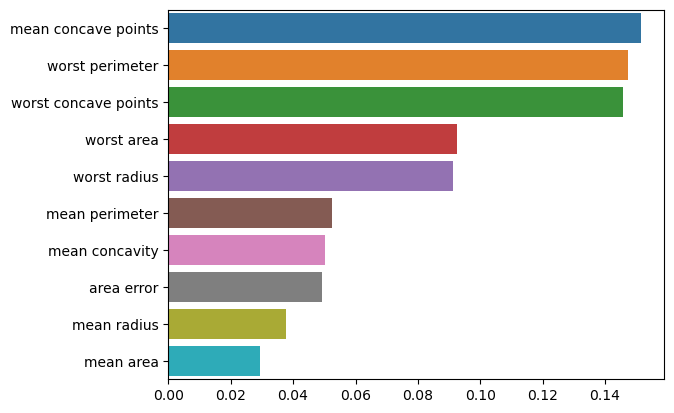

In [ ]:
# Display the top 10 most important variables.
variable_importance = pd.Series(RFC.feature_importances_, index = variable_names)
top_variables_10 = variable_importance.sort_values(ascending=False)[:10]
sns.barplot(x=top_variables_10.values, y = top_variables_10.index, ci=None)
plt.show()

### 4. Boosting Ensemble:

#### 4.1.  AdaBoost:

In [ ]:
# Classification by AdaBoost.
ABC = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10),n_estimators=100,learning_rate=0.01,random_state=123)
ABC.fit(X_train, Y_train)
Y_pred = ABC.predict(X_test)
print( "AdaBoost accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

AdaBoost accuracy : 0.924


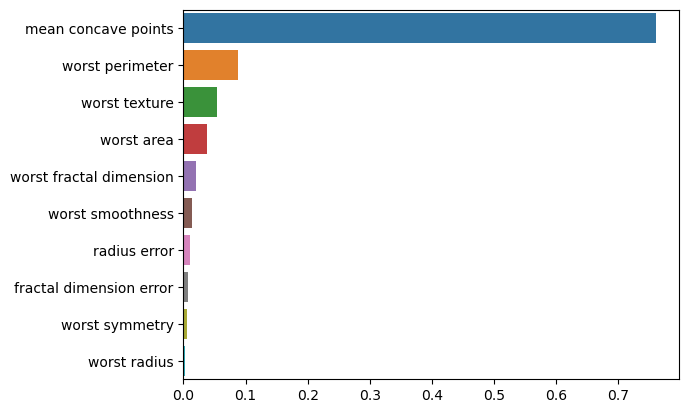

In [ ]:
# Display the top 10 most important variables.
variable_importance = pd.Series(ABC.feature_importances_, index = variable_names)
top_variables_10 = variable_importance.sort_values(ascending=False)[:10]
sns.barplot(x=top_variables_10.values, y = top_variables_10.index, ci=None)
plt.show()

#### 4.2.  Gradient Boosting:

In [ ]:
# Classification by Gradient Boosting.
GBC = GradientBoostingClassifier(n_estimators=100,learning_rate=0.01,min_samples_leaf=2,max_leaf_nodes=30,random_state=123)
GBC.fit(X_train, Y_train)
Y_pred = GBC.predict(X_test)
print( "Gradient Boosting accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Gradient Boosting accuracy : 0.906


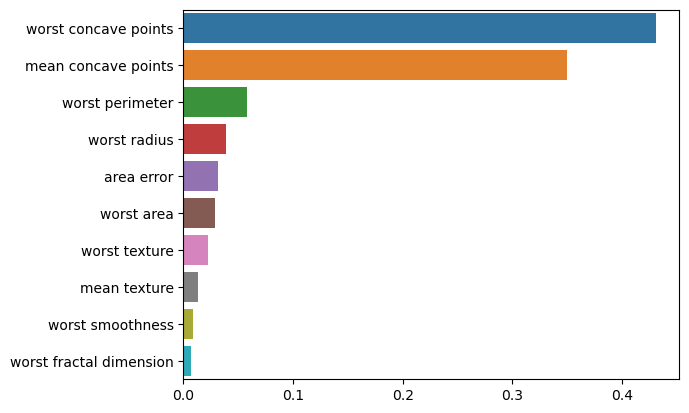

In [ ]:
# Display the top 10 most important variables.
variable_importance = pd.Series(GBC.feature_importances_, index = variable_names)
top_variables_10 = variable_importance.sort_values(ascending=False)[:10]
sns.barplot(x=top_variables_10.values, y = top_variables_10.index, ci=None)
plt.show()

#### 4.3. XGBoost:

In [ ]:
# Classification by XGBoost.
XGBC = XGBClassifier(n_estimator = 500, learning_Rate = 0.1, max_depth = 4, random_state=123)
XGBC.fit(X_train, Y_train)
Y_pred = XGBC.predict(X_test)
print( "XGBoost accuracy : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

XGBoost accuracy : 0.942


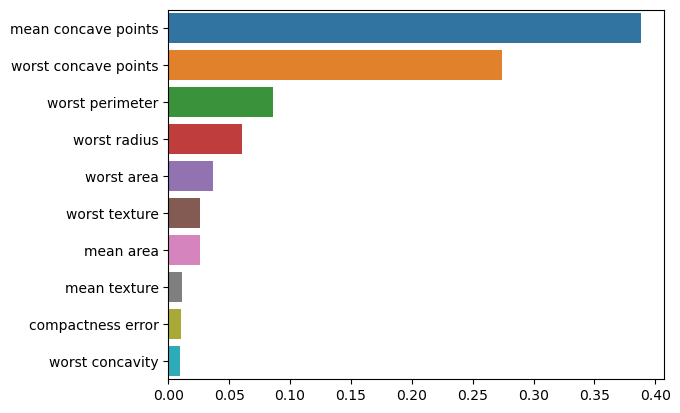

In [ ]:
# Display the top 10 most important variables.
variable_importance = pd.Series(XGBC.feature_importances_, index = variable_names)
top_variables_10 = variable_importance.sort_values(ascending=False)[:10]
sns.barplot(x=top_variables_10.values, y = top_variables_10.index, ci=None)
plt.show()